In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import pandas as pd
import matplotlib.pyplot as plt

In [45]:
demo = pd.read_csv('russian_demography.csv').drop(columns = ['npg', 'gdw', 'urbanization'])
demo.head()

,year,region,birth_rate,death_rate
0,1990,Republic of Adygea,14.2,12.3
1,1990,Altai Krai,12.9,11.1
2,1990,Amur Oblast,16.2,8.6
3,1990,Arkhangelsk Oblast,13.5,9.8
4,1990,Astrakhan Oblast,15.1,10.4


Можно посмотреть ситуацию за несколько лет в отдельном регионе.
Так, в республике Адыгея видим ожидаемый спад рождаемости и рост смертности в трудные девяностые.
В период с 1999 рост рождаемости, а в 2007 -- резкий скачок рождаемости (очевидно в связи с введением материнского капитала).
Начиная с 2014 года - резкий спал рождаемости (связь с кризисом?), правда, и снижение смертности...

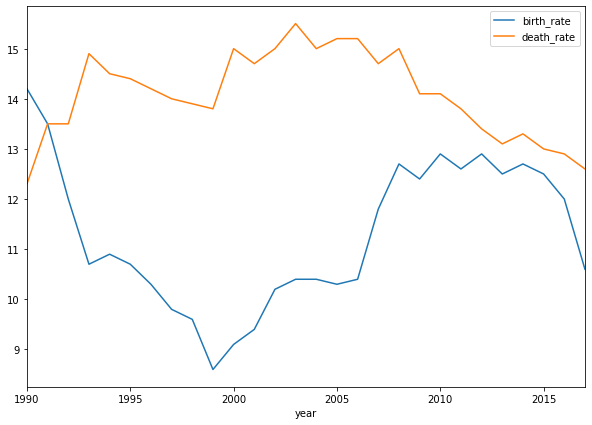

In [137]:
demo_Adygea = demo[demo['region'] == 'Republic of Adygea']
demo_Adygea.groupby('year').sum().plot()

Забавная статистика по потреблению различных видов алкоголя россиянами (данные в литрах/год на душу населения). Кто бы мог подумать, насколько много пива пьют граждане. Зато радует, что водки стали пить чуть меньше, а вина -- чуть больше.

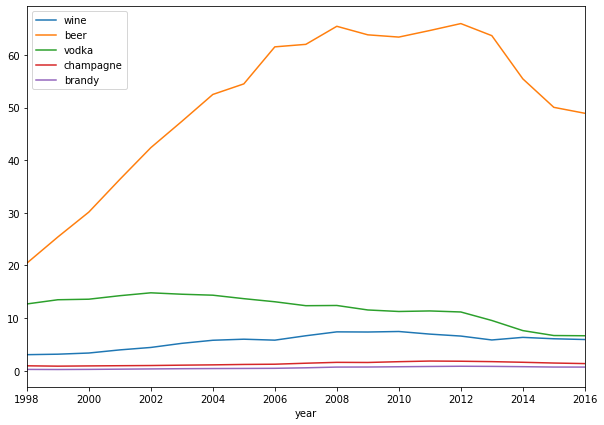

In [101]:
alco = pd.read_csv('russia_alcohol.csv')
alco.groupby('year').mean().plot()

Если пристальнее посмотреть на ситуацию "вино-водка", можно заметить, что "переломный" момент настал в районе 2002 года, когда количество водки в год на один российский организм стало постепенно снижаться. Видимо, освобождалось место для вина, чтобы к 2016 году показатели практически сравнялись. Однако "исторически" в среднем водки всё ещё пьют больше (см. коробки).

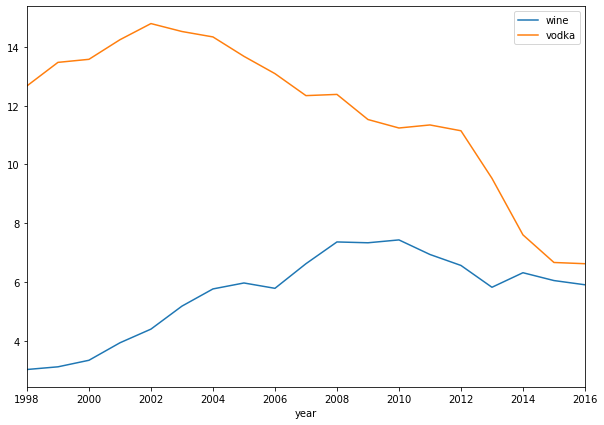

In [147]:
wine_vodka = pd.read_csv('russia_alcohol.csv').drop(columns = ['beer', 'champagne', 'brandy'])
wine_vodka.groupby('year').mean().plot()

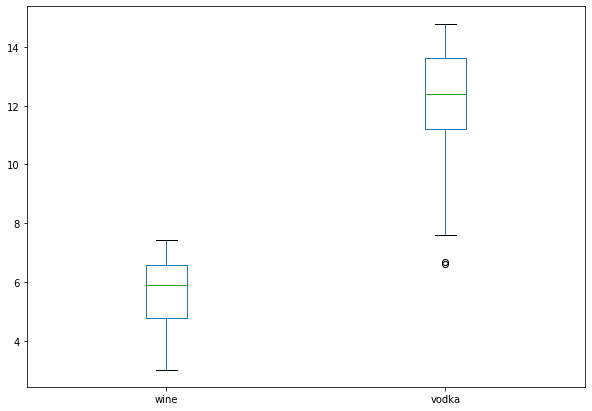

In [149]:
wine_vodka.groupby('year').mean().plot(kind = 'box')

Из кризисных годов 2008 стал самым алкогольным. Именно в этом году в Петербурге (как и в других российских городах) ввиду кризиса много людей осталось без работы, так что оставалось только пить пиво дома. :)

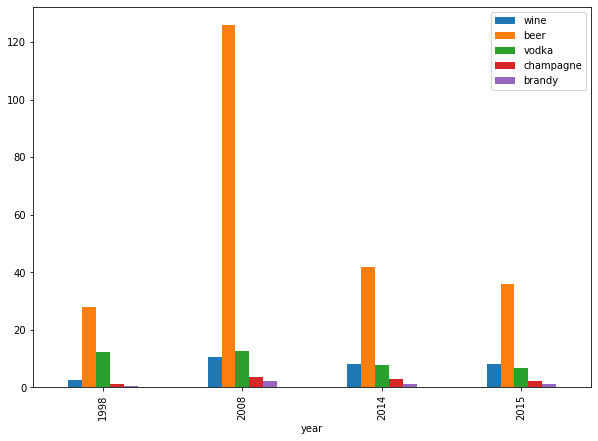

In [102]:
alco_stpete = alco[(alco.region == 'Saint Petersburg')&(alco.year.isin([1998, 2008, 2014, 2015]))]
alco_stpete_total = alco_stpete.groupby('year').sum()
alco_stpete_total.plot(kind='bar')

Распределение значений рождаемости (blue) и смертности (orange) в период с 1990 по 2017

In [134]:
import seaborn as sns

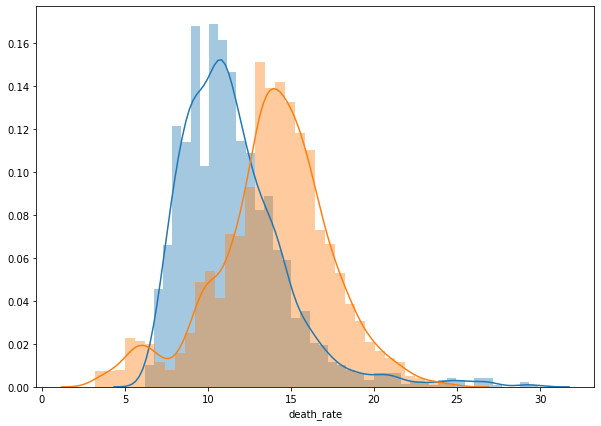

In [152]:
demo = demo.dropna()
sns.distplot(demo.birth_rate)
sns.distplot(demo.death_rate)

А здесь подтверждается негативное влияние роста урбанизации на рождаемость

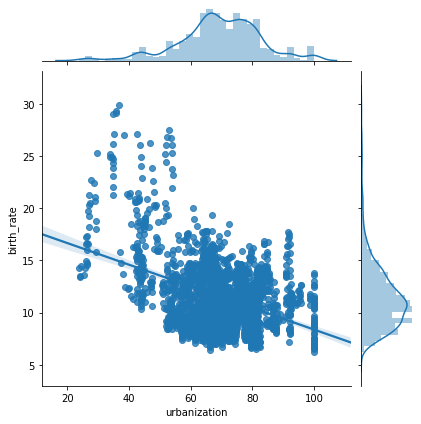

In [143]:
demo_urb = pd.read_csv('russian_demography.csv').drop(columns = ['npg', 'gdw'])
sns.jointplot(x='urbanization', y='birth_rate', 
              data=demo_urb, kind='reg')